In [1]:
import tensorflow as tf

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))

In [3]:
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.42068508],
       [-0.62834674],
       [-0.863087  ]], dtype=float32)>


In [2]:
v.assign(tf.ones(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [3]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [4]:

v.assign_add(tf.ones(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [5]:
input_var = tf.Variable(initial_value=3.)

In [6]:


input_var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [7]:
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [8]:
time = tf.Variable(0.)
time

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [9]:
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
        print(position)
    speed = inner_tape.gradient(position, time)
    print(speed)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [10]:
import numpy as np

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0, 3],
                                                 cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0],
                                                 cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))


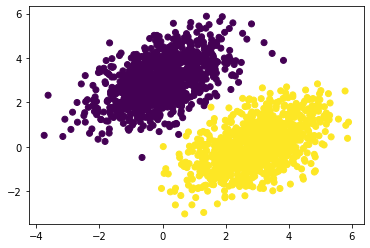

In [11]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [12]:
x = tf.Variable(tf.random.uniform((2, 2)))

with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_y_res_to_x = tape.gradient(y, x)

In [13]:
grad_y_res_to_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [14]:
num_samples_per_class = 1000

positive_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)
negative_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]],
                                                 size=num_samples_per_class)


In [15]:
positive_samples

array([[-0.31121049,  1.85206148],
       [ 0.8136771 ,  3.44647352],
       [-1.58055774,  2.36331113],
       ...,
       [ 0.29119912,  3.76328292],
       [ 1.21649969,  4.22058896],
       [ 0.9884382 ,  4.04184525]])

In [16]:
inputs = np.vstack((positive_samples, negative_samples)).astype(np.float32)

In [17]:
inputs

array([[-0.31121048,  1.8520615 ],
       [ 0.8136771 ,  3.4464736 ],
       [-1.5805577 ,  2.363311  ],
       ...,
       [ 2.2454453 ,  0.37934914],
       [ 1.7902404 ,  0.05517759],
       [ 3.4349186 , -1.1368077 ]], dtype=float32)

In [18]:
targets = np.vstack((np.zeros(shape=(num_samples_per_class, 1), dtype='float32'), np.ones(
    shape=(num_samples_per_class, 1), dtype='float32'
)))

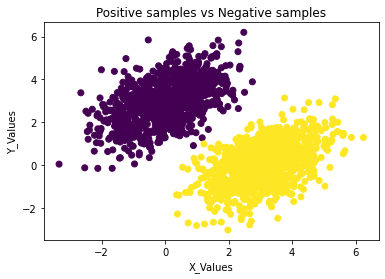

In [19]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.title('Positive samples vs Negative samples')
plt.savefig('Linear classification')
plt.xlabel('X_Values')
plt.ylabel('Y_Values')
plt.show()

In [20]:
inp_dim = 2
out_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(inp_dim, out_dim)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(out_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(predictions, targets):
    per_sample_losses = tf.square(predictions - targets)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    gradient_loss_wrt_W, gradient_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(gradient_loss_wrt_W * learning_rate)
    b.assign_sub(gradient_loss_wrt_b * learning_rate)
    return loss

#Conduct batch training instead of mini-batch training. Gradient update will be fast and
#effective

for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')


Loss at step 0: 7.3771
Loss at step 1: 0.8603
Loss at step 2: 0.1339
Loss at step 3: 0.0442
Loss at step 4: 0.0326
Loss at step 5: 0.0307
Loss at step 6: 0.0300
Loss at step 7: 0.0295
Loss at step 8: 0.0290
Loss at step 9: 0.0286
Loss at step 10: 0.0282
Loss at step 11: 0.0278
Loss at step 12: 0.0275
Loss at step 13: 0.0272
Loss at step 14: 0.0269
Loss at step 15: 0.0267
Loss at step 16: 0.0265
Loss at step 17: 0.0263
Loss at step 18: 0.0261
Loss at step 19: 0.0259
Loss at step 20: 0.0257
Loss at step 21: 0.0256
Loss at step 22: 0.0254
Loss at step 23: 0.0253
Loss at step 24: 0.0252
Loss at step 25: 0.0251
Loss at step 26: 0.0250
Loss at step 27: 0.0249
Loss at step 28: 0.0248
Loss at step 29: 0.0248
Loss at step 30: 0.0247
Loss at step 31: 0.0246
Loss at step 32: 0.0246
Loss at step 33: 0.0245
Loss at step 34: 0.0245
Loss at step 35: 0.0244
Loss at step 36: 0.0244
Loss at step 37: 0.0244
Loss at step 38: 0.0243
Loss at step 39: 0.0243


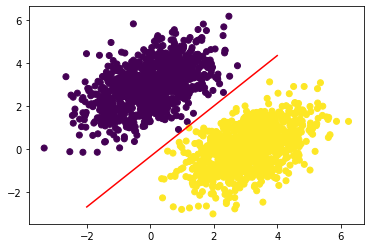

In [21]:
predictions = model(inputs)
x = np.linspace(-2, 4, 100)
y = -(W[0]/W[1])*x + ((0.5 - b)/W[1])
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.savefig('Linear classification_2')
plt.show()

In [22]:
from tensorflow import keras

class NaiveDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,), initializer='zeros')

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [23]:
my_dense = NaiveDense(64, tf.nn.relu)
# my_dense.build(1000, 2)
my_model = my_dense(tf.ones(shape=(1000, 2)))

In [24]:
my_model

<tf.Tensor: shape=(1000, 64), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.0057395 , 0.0154179 ,
        0.01958948],
       [0.        , 0.        , 0.        , ..., 0.0057395 , 0.0154179 ,
        0.01958948],
       [0.        , 0.        , 0.        , ..., 0.0057395 , 0.0154179 ,
        0.01958948],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0057395 , 0.0154179 ,
        0.01958948],
       [0.        , 0.        , 0.        , ..., 0.0057395 , 0.0154179 ,
        0.01958948],
       [0.        , 0.        , 0.        , ..., 0.0057395 , 0.0154179 ,
        0.01958948]], dtype=float32)>

In [25]:
#So basically automatic shape inference is handled by the __call__ method
#The following schematic explains how it is handled

def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)

In [26]:
print(np.random.permutation(20))

[16 18 13 19 12 10 14  3  1  2  9  7  6  5 17 11  8  4 15  0]
